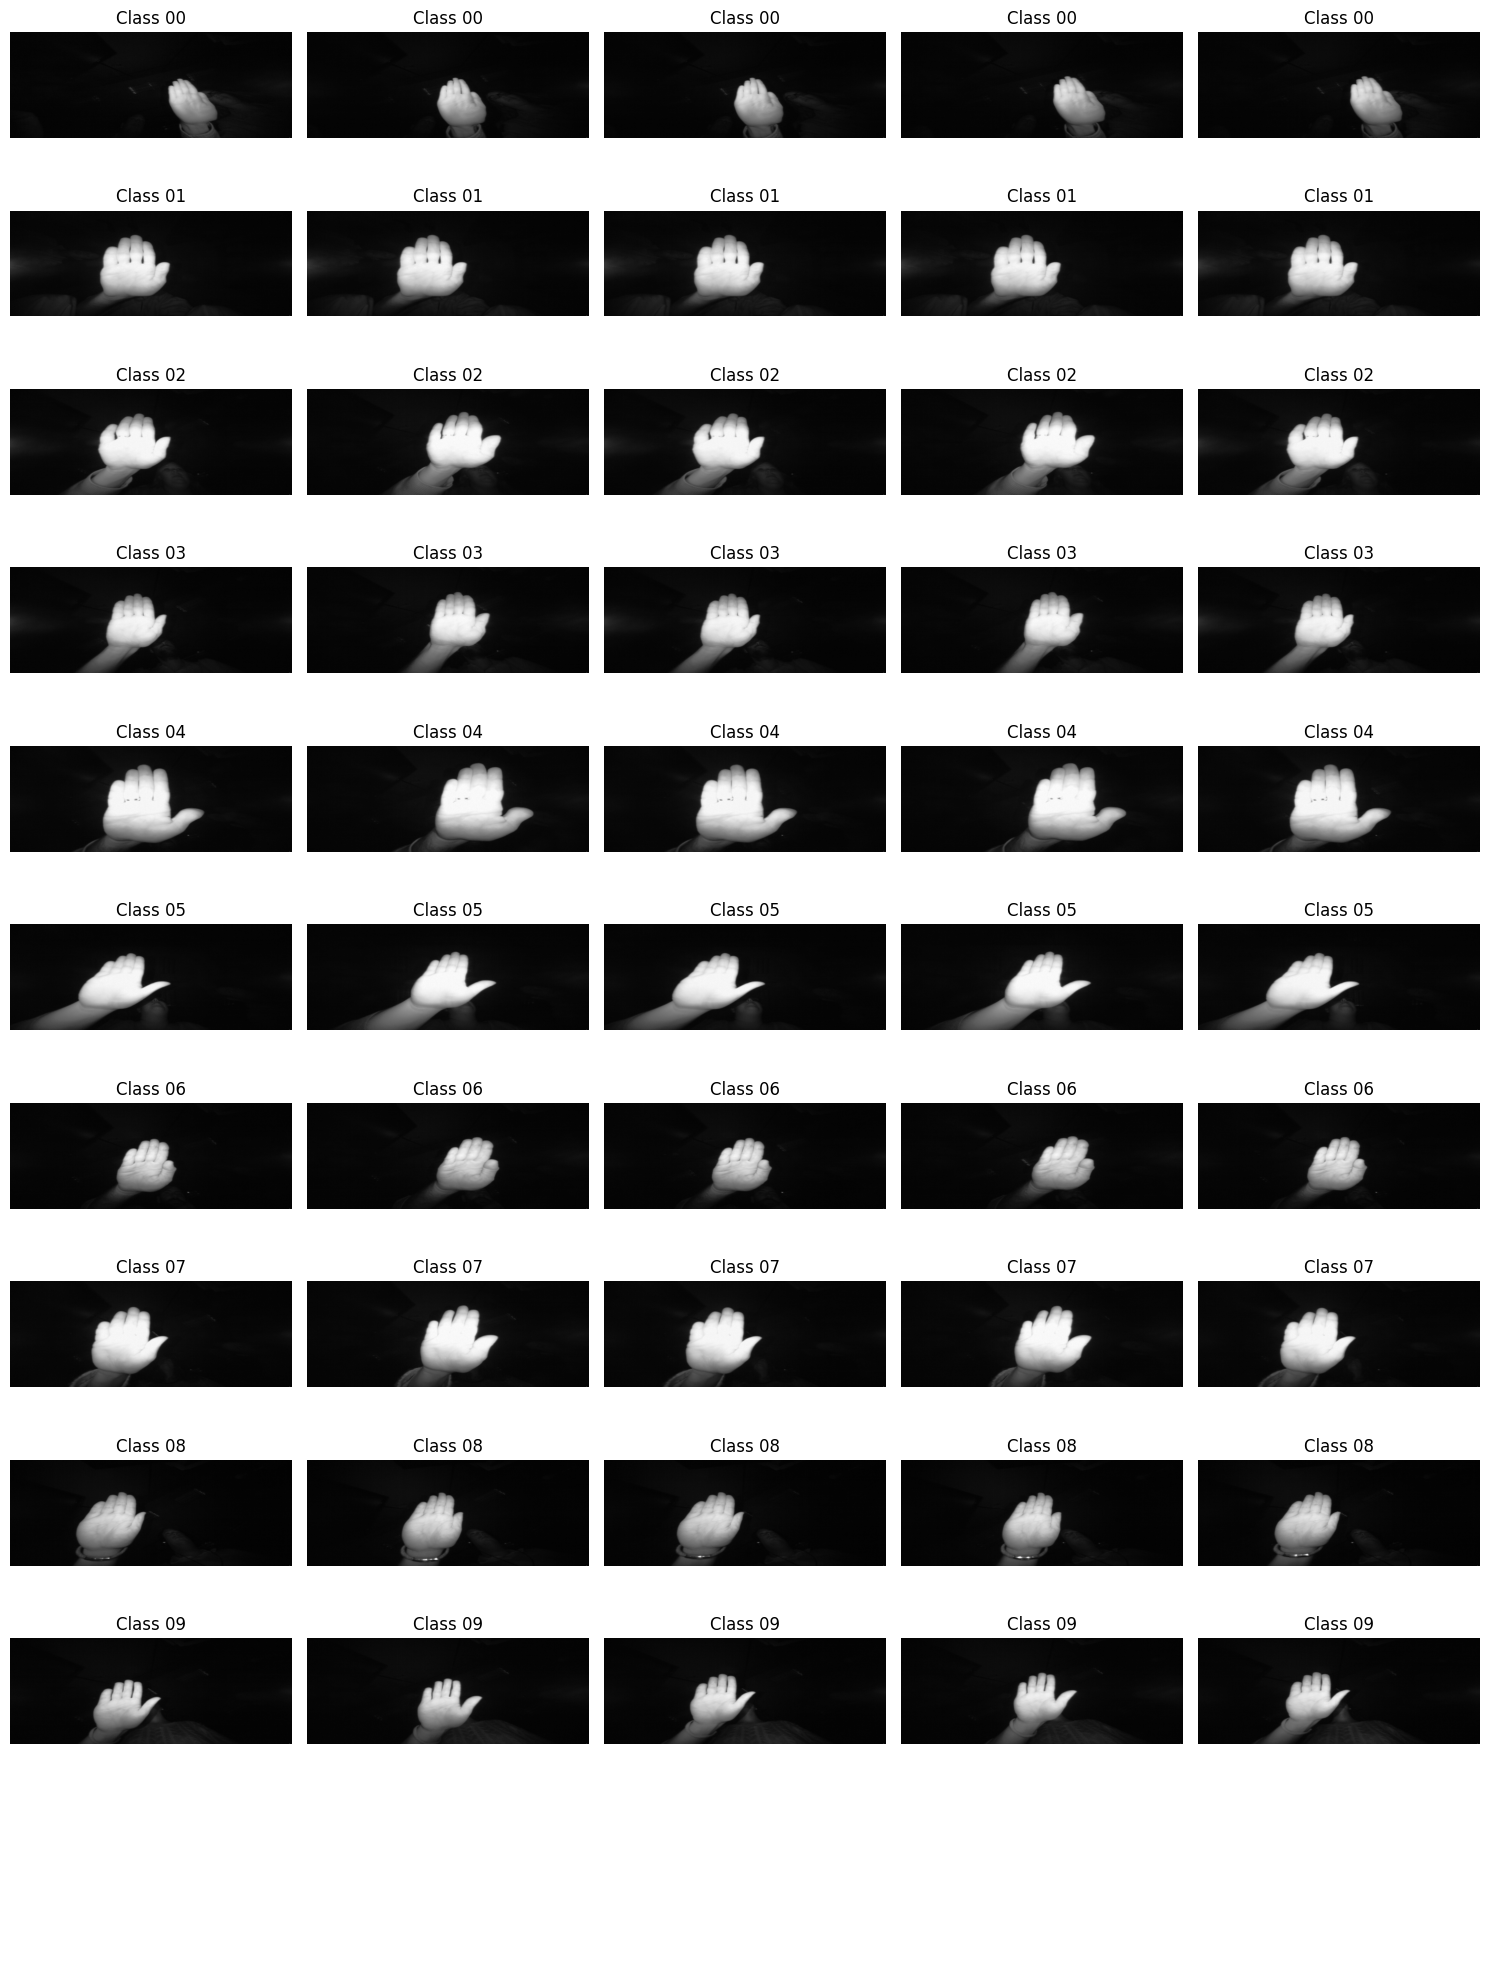

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the directory containing hand gesture images
data_dir = r"C:\Users\varun\Downloads\Hand_gesture_files\leapGestRecog"

# Function to recursively find all PNG files in the directory
def find_png_files(directory):
    png_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.png'):
                png_files.append(os.path.join(root, file))
    return png_files

# Get a list of all PNG image files in the directory
image_files = find_png_files(data_dir)

# Load and visualize sample images from each class
num_classes = 11  # Number of gesture classes
num_samples_per_class = 5  # Number of samples to visualize per class

# Initialize a subplot grid for visualization
fig, axes = plt.subplots(num_classes, num_samples_per_class, figsize=(15, 20))

# Iterate through each class and load sample images
for i in range(num_classes):
    if i == 10:
        class_dir = os.path.join(data_dir, "10")
    else:
        class_dir = os.path.join(data_dir, f"{i:02d}")
    class_image_files = find_png_files(class_dir)
    num_images = len(class_image_files)
    for j in range(min(num_samples_per_class, num_images)):
        # Load image
        image = cv2.imread(class_image_files[j])
        # Convert from BGR to RGB (OpenCV loads images in BGR format)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Display image
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"Class {i:02d}")

    # If there are fewer than num_samples_per_class images for the class, fill the remaining slots with a blank image
    for j in range(num_images, num_samples_per_class):
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


In [6]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to preprocess and augment images
def preprocess_and_augment(image_files, target_size=(64, 64), batch_size=32):
    # Initialize ImageDataGenerator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest',
        rescale=1./255  # Normalize pixel values to [0, 1]
    )

    # Load and preprocess images using the generator
    image_data_generator = datagen.flow_from_directory(
        directory=image_files,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=None,  # Since we don't have class labels in the directory structure
        shuffle=True
    )

    return image_data_generator

# Path to the directory containing hand gesture images
data_dir = r"C:\Users\varun\Downloads\Hand_gesture_files\leapGestRecog"

# Preprocess and augment the images
image_data_generator = preprocess_and_augment(data_dir)



Found 40000 images belonging to 11 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model architecture
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Input shape of the images (height, width, channels)
input_shape = (64, 64, 3)  # Assuming images are resized to 64x64 pixels and have 3 color channels (RGB)
num_classes = 11  # Number of hand gesture classes

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)       

In [11]:
# Define variables
data_dir = r"C:\Users\varun\Downloads\Hand_gesture_files\leapGestRecog"  # Path to the directory containing hand gesture images
target_size = (64, 64)  # Target size of the images (height, width)
batch_size = 32  # Batch size

# Initialize ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Load and preprocess images using the generator
image_data_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 40000 images belonging to 11 classes.


In [12]:
# Initialize ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,  # Randomly rotate the images by up to 30 degrees
    width_shift_range=0.1,  # Randomly shift the images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Randomly shift the images vertically by up to 10% of the height
    shear_range=0.2,  # Apply random shearing transformations
    zoom_range=0.2,  # Apply random zoom transformations
    horizontal_flip=True,  # Randomly flip the images horizontally
    vertical_flip=True,  # Randomly flip the images vertically
    fill_mode='nearest',  # Strategy for filling in newly created pixels
    rescale=1./255  # Normalize pixel values to [0, 1]
)


In [13]:
# Load and preprocess images using the generator
image_data_generator = datagen.flow_from_directory(
    directory=data_dir,  # Path to the directory containing hand gesture images
    target_size=target_size,  # Target size of the images (height, width)
    batch_size=batch_size,  # Batch size
    class_mode='categorical'  # Use categorical mode for multi-class classification
)


Found 40000 images belonging to 11 classes.


In [16]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf

@tf.function(autograph=False)
def train_model():
    history = model.fit(
        image_data_generator,
        steps_per_epoch=image_data_generator.samples // image_data_generator.batch_size,
        epochs=10,
        verbose=1
    )
    return history


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Define the target size for resizing images
target_size = (64, 64)

# Define the batch size for training
batch_size = 32

# Define the path to the directory containing hand gesture images
data_dir = r"C:\Users\varun\Downloads\Hand_gesture_files\leapGestRecog"

# Load and preprocess images using the generator
image_data_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 40000 images belonging to 11 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           5,643 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,458,699 (9.38 MB)

 Trainable params: 2,458,699 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
history = model.fit(
    image_data_generator,
    steps_per_epoch=image_data_generator.samples // image_data_generator.batch_size,
    epochs=10,
    verbose=1
)


Epoch 1/10


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 245s 193ms/step - accuracy: 0.5000 - loss: 1.8189
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 251s 200ms/step - accuracy: 0.4956 - loss: 1.4338
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 232s 184ms/step - accuracy: 0.4857 - loss: 1.1944
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 231s 184ms/step - accuracy: 0.4928 - loss: 1.0620
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 232s 185ms/step - accuracy: 0.4952 - loss: 0.9865
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [11]:
class MyPyDataset(tf.data.Dataset):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

# Use MyPyDataset instead of PyDataset


In [12]:
# Check the data generator configuration and data loading process
# Ensure that the target_size, batch_size, and other parameters are correctly set
# Verify the directory structure and file formats of the input data
data_dir = r"C:\Users\varun\Downloads\Hand_gesture_files\leapGestRecog"
target_size = (64, 64)  # Adjust as needed
batch_size = 32  # Adjust as needed

# Initialize ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Load and preprocess images using the generator
image_data_generator = datagen.flow_from_directory(
    directory=data_dir,  # Path to the directory containing hand gesture images
    target_size=target_size,  # Target size of the images (height, width)
    batch_size=batch_size,  # Batch size
    class_mode='categorical'  # Use categorical mode for multi-class classification
)


Found 40000 images belonging to 11 classes.


In [13]:
# Review the model architecture to ensure it's appropriate for the task
# Check the number of layers, their configurations, and the output layer for the correct number of classes
# Consider adding more layers, adjusting the number of units, or using different activation functions
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')  # 11 classes for hand gestures
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from keras.optimizers import Adam
# Ensure that the loss function is compatible with the problem (e.g., categorical cross-entropy for multi-class classification)
# Check the optimizer and its parameters (e.g., learning rate)
# Experiment with different optimizers (e.g., Adam, RMSprop) and learning rates to improve convergence
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Insert print statements or use TensorFlow Debugger (tf.debugging) to inspect data batches, model outputs, and gradients during training
# This can help identify any issues with the data or model architecture
history = model.fit(
    image_data_generator,
    steps_per_epoch=image_data_generator.samples // image_data_generator.batch_size,
    epochs=10,
    verbose=1
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 238s 188ms/step - accuracy: 0.4978 - loss: 1.8287
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 247s 197ms/step - accuracy: 0.4989 - loss: 1.6004
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 237s 189ms/step - accuracy: 0.4925 - loss: 1.3379
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 236s 188ms/step - accuracy: 0.4880 - loss: 1.1532
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 236s 188ms/step - accuracy: 0.4901 - loss: 1.0562
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [18]:
# Check the number of samples in the dataset
print("Number of samples:", image_data_generator.samples)

# Print model summary to check input shape
print(model.summary())


Number of samples: 40000


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │           5,643 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,376,099 (28.14 MB)

 Trainable params: 2,458,699 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,917,400 (18.76 MB)

None


In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))  # Adjust the output units based on the number of classes

# Print model summary to check input shape and layer configuration
print(model.summary())


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           5,643 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,458,699 (9.38 MB)

 Trainable params: 2,458,699 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

None


In [2]:
from keras.optimizers import Adam

# Compile the model with appropriate loss function, optimizer, and metrics
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Define the target size for resizing images
target_size = (64, 64)

# Define the batch size for training
batch_size = 32

# Define the path to the directory containing hand gesture images
data_dir = r"C:\Users\varun\Downloads\Hand_gesture_files\leapGestRecog"

# Load and preprocess images using the generator
image_data_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 40000 images belonging to 11 classes.


Found 40000 images belonging to 11 classes.


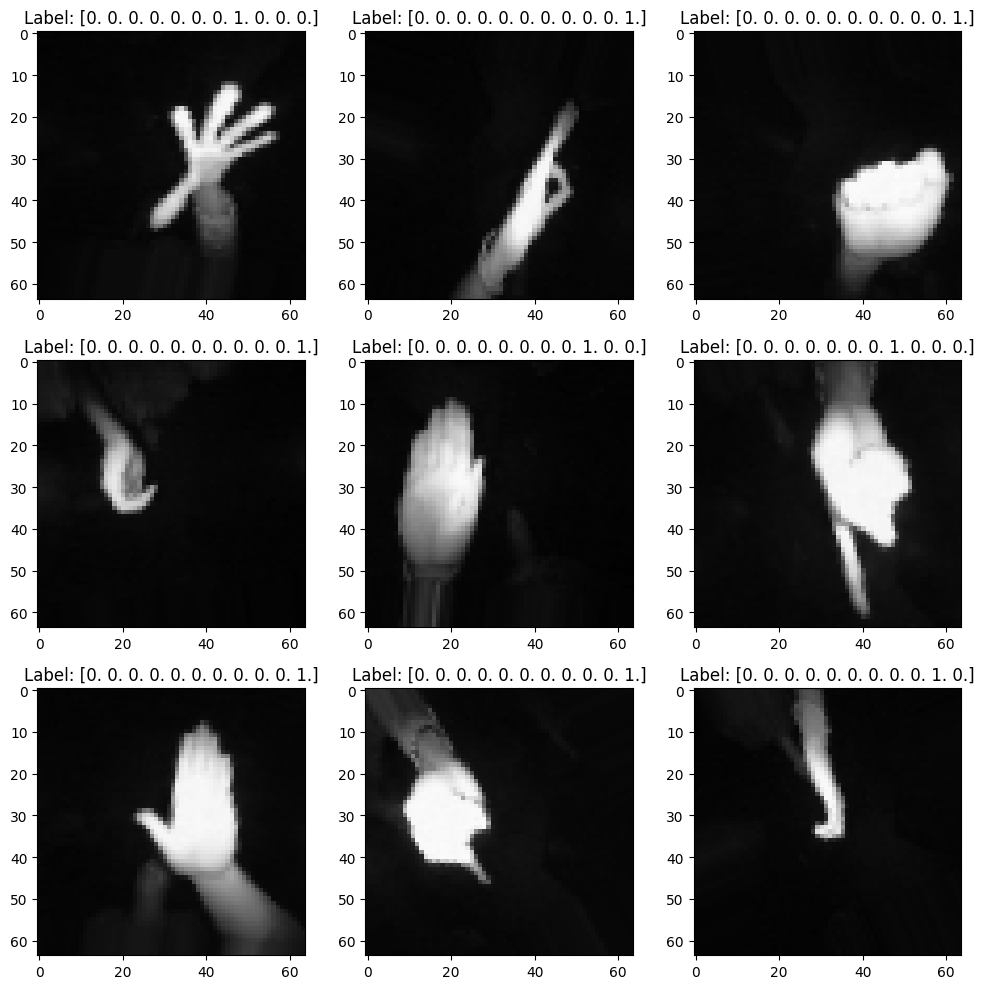

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Define the target size for resizing images
target_size = (64, 64)

# Define the batch size for training
batch_size = 32

# Define the path to the directory containing hand gesture images
data_dir = r"C:\Users\varun\Downloads\Hand_gesture_files\leapGestRecog"

# Load and preprocess images using the generator
image_data_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Get some sample images from the generator
sample_images, sample_labels = next(image_data_generator)

# Create a figure to display the images
plt.figure(figsize=(10, 10))

# Display the first 9 images with their labels
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {sample_labels[i]}")

plt.tight_layout()
plt.show()


In [10]:
pip install opencv-python


Found 40000 images belonging to 11 classes.


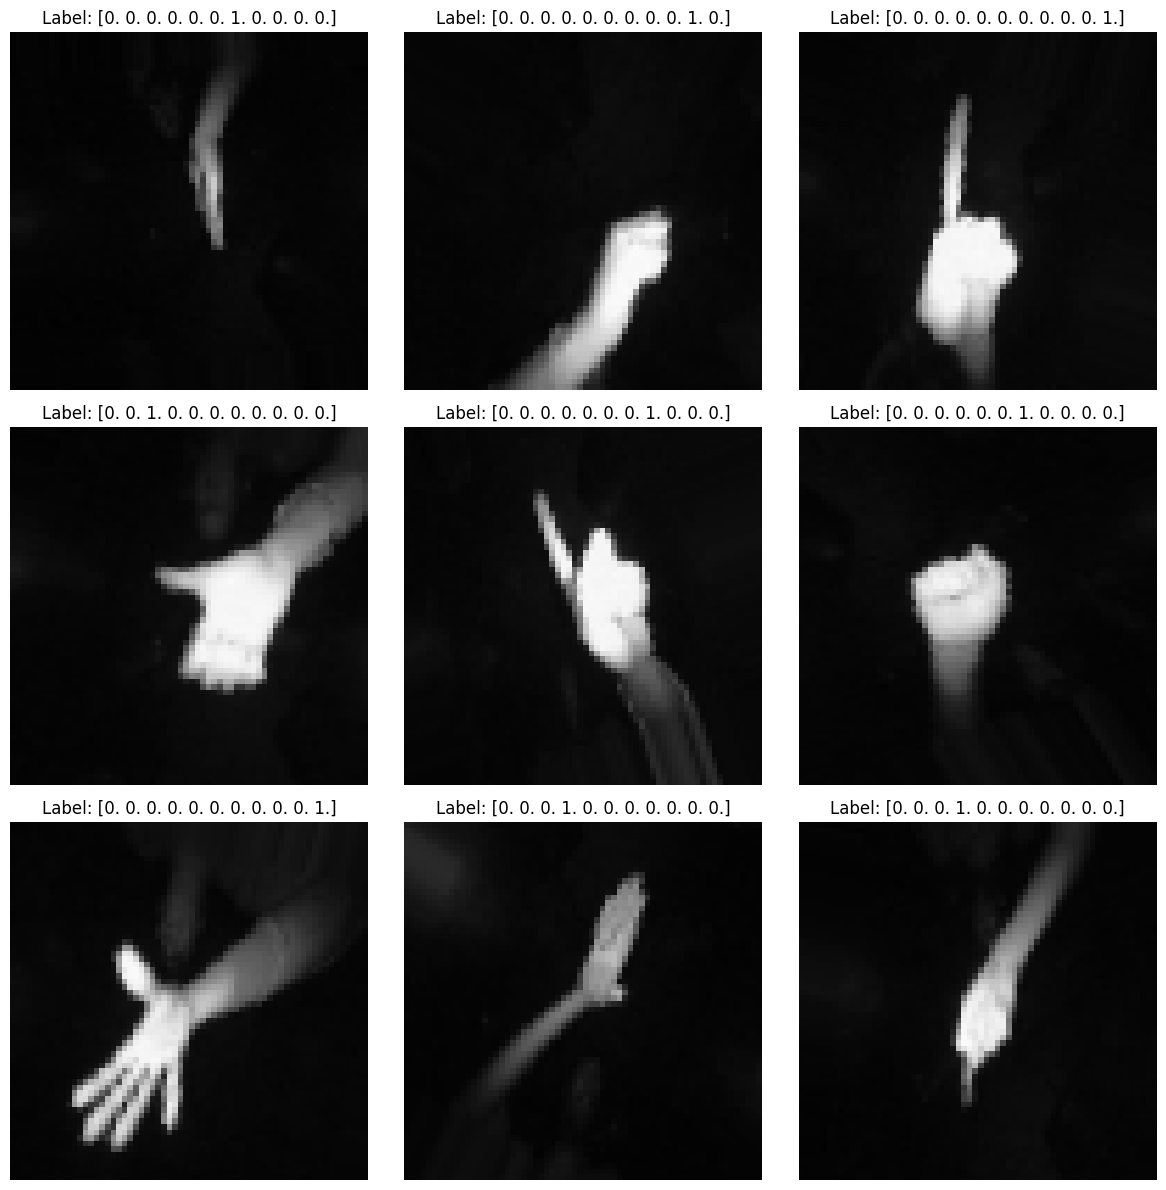

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Define the target size for resizing images
target_size = (64, 64)

# Define the batch size for training
batch_size = 32

# Define the path to the directory containing hand gesture images
data_dir = r"C:\Users\varun\Downloads\Hand_gesture_files\leapGestRecog"

# Load and preprocess images using the generator
image_data_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Get some sample images from the generator
sample_images, sample_labels = next(image_data_generator)

# Create a figure to display the images
plt.figure(figsize=(12, 12))

# Display the first 9 images with their labels
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {sample_labels[i]}", fontsize=12)
    plt.axis('off')  # Remove axis
    plt.grid(False)  # Remove grid lines

plt.tight_layout()
plt.show()


Found 40000 images belonging to 11 classes.


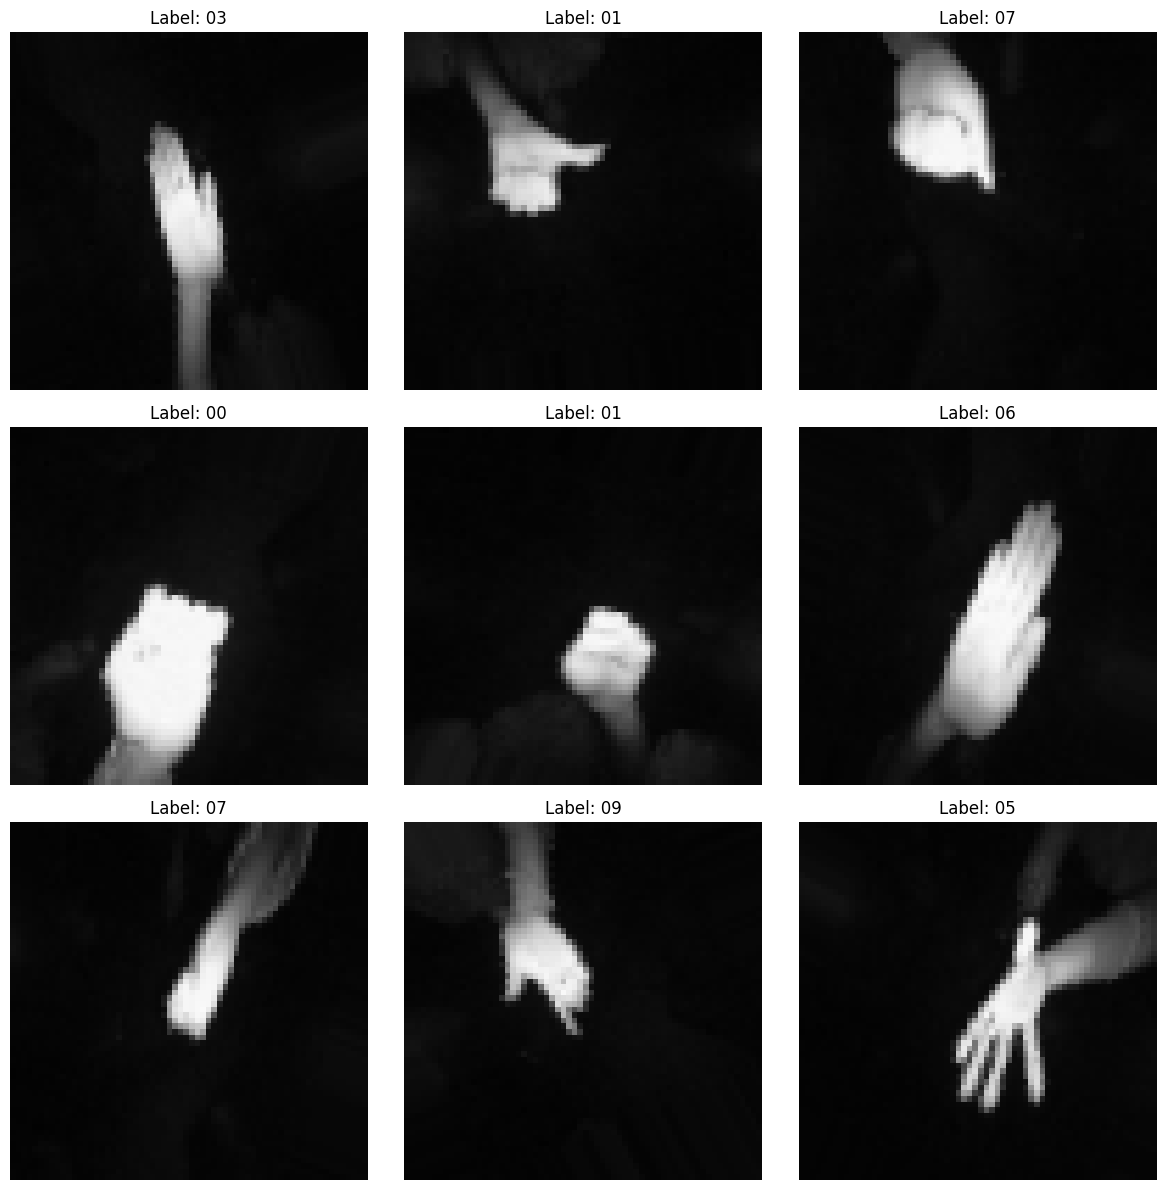

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Define the target size for resizing images
target_size = (64, 64)

# Define the batch size for training
batch_size = 32

# Define the path to the directory containing hand gesture images
data_dir = r"C:\Users\varun\Downloads\Hand_gesture_files\leapGestRecog"

# Load and preprocess images using the generator
image_data_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Get the class labels and their corresponding indices
class_labels = list(image_data_generator.class_indices.keys())

# Get some sample images from the generator
sample_images, sample_labels = next(image_data_generator)

# Create a figure to display the images
plt.figure(figsize=(12, 12))

# Display the first 9 images with their labels
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    predicted_class_index = sample_labels[i].argmax()
    plt.title(f"Label: {class_labels[predicted_class_index]}", fontsize=12)
    plt.axis('off')  # Remove axis

plt.tight_layout()
plt.show()


Found 40000 images belonging to 11 classes.


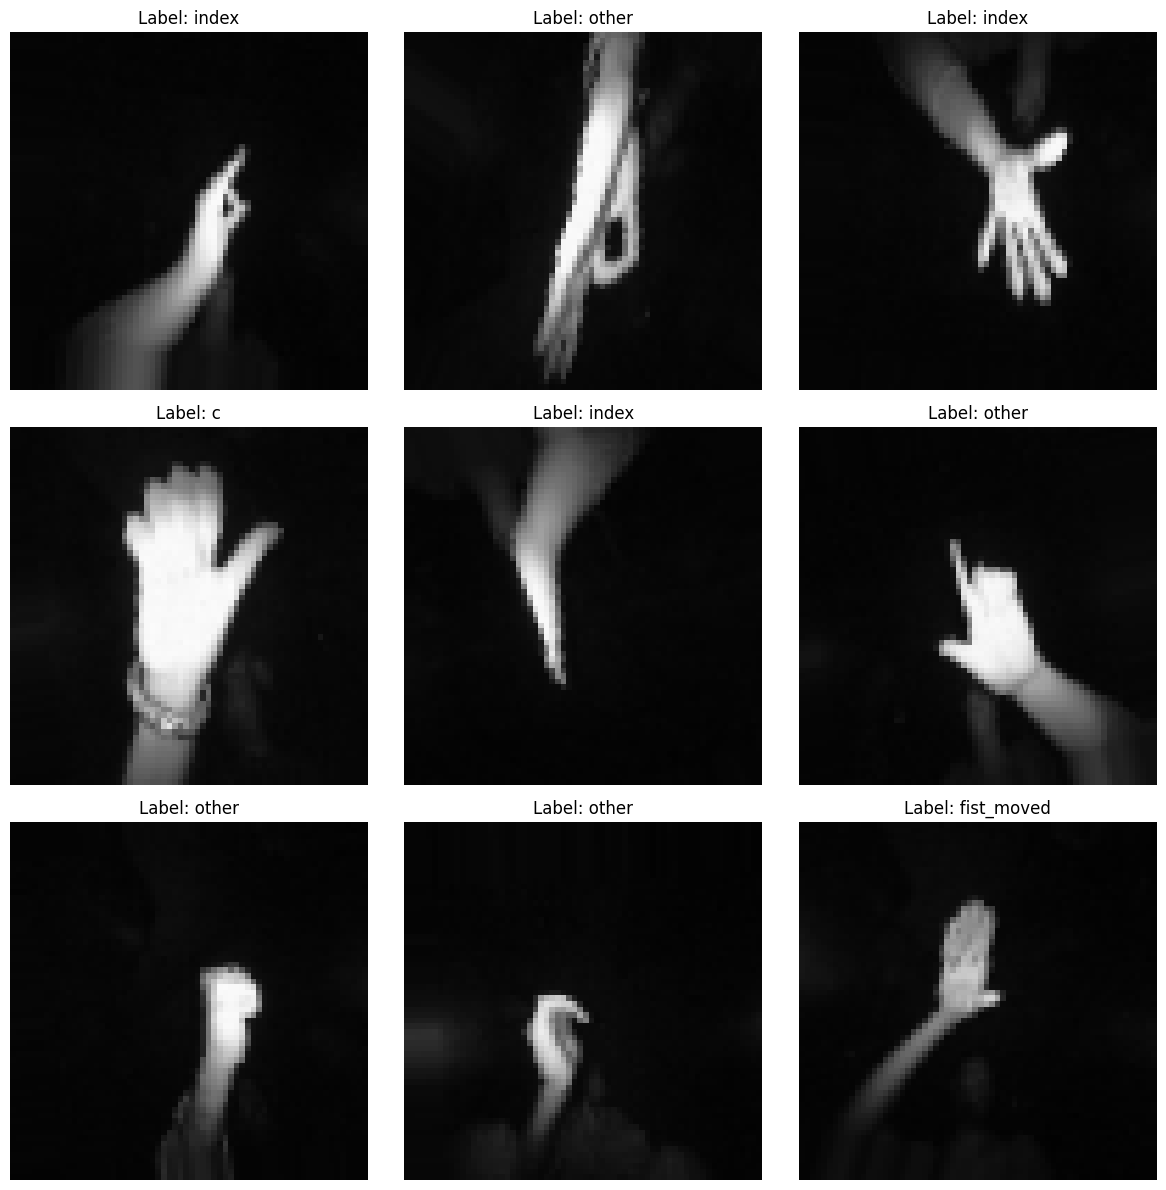

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Define the target size for resizing images
target_size = (64, 64)

# Define the batch size for training
batch_size = 32

# Define the path to the directory containing hand gesture images
data_dir = r"C:\Users\varun\Downloads\Hand_gesture_files\leapGestRecog"

# Load and preprocess images using the generator
image_data_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define a mapping from class index to movement name
# Define a mapping from class index to movement name
class_to_movement = {
    0: 'palm',
    1: 'L',
    2: 'fist',
    3: 'fist_moved',
    4: 'thumb',
    5: 'index',
    6: 'ok',
    7: 'palm_moved',
    8: 'c',
    9: 'down',
    10: 'other'  # Add a catch-all label for any unexpected classes
}


# Get some sample images from the generator
sample_images, sample_labels = next(image_data_generator)

# Create a figure to display the images
plt.figure(figsize=(12, 12))

# Display the first 9 images with their labels
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    predicted_class_index = sample_labels[i].argmax()
    movement_name = class_to_movement.get(predicted_class_index, "Unknown")
    plt.title(f"Label: {movement_name}", fontsize=12)
    plt.axis('off')  # Remove axis

plt.tight_layout()
plt.show()


In [26]:
# Print unique values in the sample_labels array
unique_labels = np.unique(sample_labels.argmax(axis=1))
print("Unique class indices in sample_labels:", unique_labels)

# Print the entire sample_labels array
print("Sample labels array:")
print(sample_labels)


Unique class indices in sample_labels: [ 1  2  3  4  5  6  8  9 10]
Sample labels array:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 

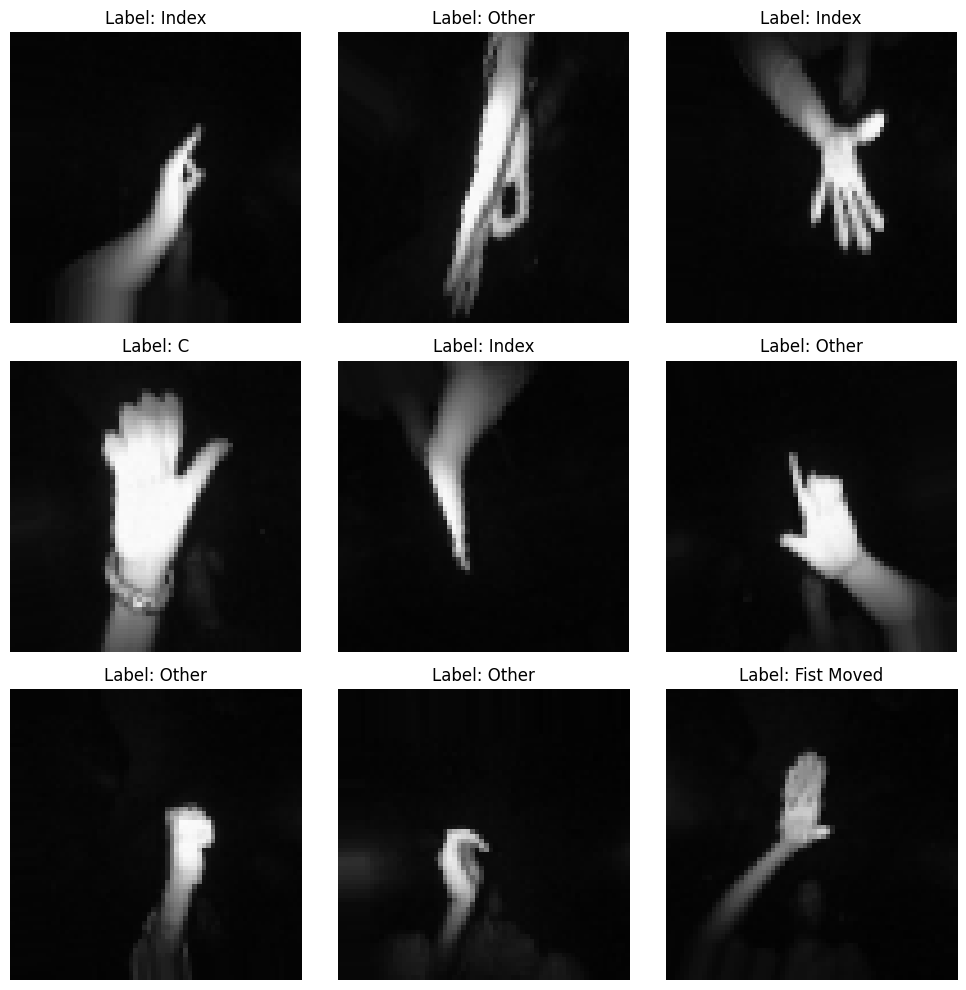

In [27]:
# Dictionary mapping class indices to gesture names
label_map = {
    0: "Palm",
    1: "L",
    2: "Fist",
    3: "Fist Moved",
    4: "Thumb",
    5: "Index",
    6: "OK",
    7: "Palm Moved",
    8: "C",
    9: "Down",
    10: "Other"
}

# Create a figure to display the images
plt.figure(figsize=(10, 10))

# Display the images with their labels
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    predicted_class_index = sample_labels[i].argmax()
    gesture_name = label_map.get(predicted_class_index, "Unknown")
    plt.title(f"Label: {gesture_name}", fontsize=12)
    plt.axis('off')  # Remove axis

plt.tight_layout()
plt.show()


In [28]:
# Dictionary mapping class indices to gesture names
label_map = {
    0: "Palm",
    1: "L",
    2: "Fist",
    3: "Fist Moved",
    4: "Thumb",
    5: "Index",
    6: "OK",
    7: "Palm Moved",
    8: "C",
    9: "Down",
    10: "Other"
}
